In [1]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

from pycocotools.coco import COCO

In [2]:
# specify dataset and annotation directories
data_dir = 'dataset'
data_type = 'val2017'
ann_file = '{}/annotations/instances_{}.json'.format(data_dir, data_type)

In [3]:
# initialize coco api
coco = COCO(ann_file)

loading annotations into memory...
Done (t=0.44s)
creating index...
index created!


In [4]:
# display COCO categories
categories = coco.loadCats(coco.getCatIds())
names = [category['name'] for category in categories]
print('COCO categories: \n{}\n'.format(' '.join(names)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush



In [5]:
# display COCO supercategories
super_names = set([category['supercategory'] for category in categories])
print('COCO supercategories: \n{}'.format(' '.join(super_names)))

COCO supercategories: 
sports animal appliance kitchen outdoor furniture vehicle electronic indoor person food accessory


In [6]:
# Assign id to each supercategory
print('ID', 'Supercategory', sep='\t')
print('-' * 22)
supercategory_ids = {}
for idx, super_name in enumerate(super_names):
    supercategory_ids[super_name] = idx
    print(idx, super_name, sep='\t')

ID	Supercategory
----------------------
0	sports
1	animal
2	appliance
3	kitchen
4	outdoor
5	furniture
6	vehicle
7	electronic
8	indoor
9	person
10	food
11	accessory


In [7]:
# Create a dictionary
# key: supercategory
# value: 'set' of corresponding image ids

supercategory_to_img = {}
for category in categories:
    supercategory = category['supercategory']
    category_id = coco.getCatIds(catNms=category['name'])
    img_ids = coco.getImgIds(catIds=category_id)
    if supercategory in supercategory_to_img:
        supercategory_to_img[supercategory] |= set(img_ids)
    else:
        supercategory_to_img[supercategory] = set(img_ids)

In [8]:
# Create a dictionary
# key: image id
# value: one-hot vector of supercategories the image belongs to

image_to_supercategories = {}
for supercategory, img_ids in supercategory_to_img.items():
    for img_id in img_ids:
        if img_id in image_to_supercategoriesries:
            image_to_supercategories[img_id][supercategory_ids[supercategory]] = 1
        else:
            one_hot = [0] * len(super_names)
            one_hot[supercategory_ids[supercategory]] = 1
            image_to_supercategories[img_id] = one_hot

In [9]:
image_to_supercategories

{532481: [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 458755: [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 385029: [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
 311303: [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
 393226: [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
 532493: [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 8211: [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
 327701: [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 188439: [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 434204: [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
 401446: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 213033: [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 466986: [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 213035: [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
 319534: [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 516143: [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 32817: [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 532530: [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 188465: [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 434230: [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
 475191: [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 254016: [0, 0, 

In [10]:
# Get Image
img = coco.loadImgs([532481])[0]

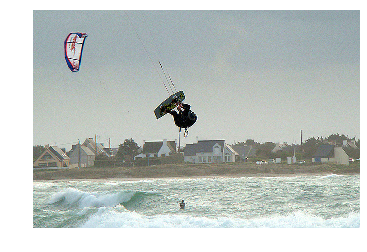

In [11]:
# load and display image
I = io.imread('%s/%s/%s'%(data_dir, data_type, img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

In [12]:
# get image description
img

{'license': 3,
 'file_name': '000000532481.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg',
 'height': 426,
 'width': 640,
 'date_captured': '2013-11-20 16:28:24',
 'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg',
 'id': 532481}